In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Health Exploration and Analytics
## What makes us sick? <br/>
## Author: Stanislav Dimitrov

## Problem definition
How do economical factors influence health across countries?

## Data acquisition
- Economic factors data: agriculture_gdp_pct, industry_gdp_pct, services_gdp_pct
- Demographic factors data: under_five_mortality_rate, urban_population_pct, life_expectancy_at_birth
- Direct factors data: carbon_dioxide_emissions_per_capita
- Indirect factors data: coal_consumption_per_capita, electricity_consumption_per_capita, total_health_expenditure_gdp_pct <br><br>



Source: [Gapminder](https://www.gapminder.org)

## Data selection motivation
- agriculture, industry and services corespond to the three main economic sectors
- children mortatlity is a key demographic indicator and an important measurer of health state on the entire population
- people's life expectancy is an important demographic factor to determine the quality of life
- air quality directly affects the people's health
- assume that coal consumption indireclty affects health trough harmful emmisions as a result of their burning
- assume that electricity consumption indirectly affects health because it depends mostly on coal which probably increase coal consumption and carbon dioxide emissions respectively
- assume that the percent of urban population affects health with much carbon emissions from one side and better healh providing from the other
- assume that more expenditure for healthcare improves health in general

## 1. Read, tidy,  clean and validate data

In [3]:
def rename_country_column(dataframe):
    """
    Rename df first column to `country`
    """
    dataframe.columns.values[0] = "country"
    
    return dataframe

In [4]:
def convert_year_column(dataframe):
    """
    Convert df `year` column to type `int`
    """
    dataframe['year'] = dataframe['year'].astype(int)
    
    return dataframe

In [5]:
def melt_data(dataframe, column_name):
    """
    Melt df to the desired column
    """
    dataframe = pd.melt(dataframe,
        id_vars = ["country"],
        var_name = "year",
        value_name = column_name)
                        
    return dataframe

In [6]:
def merge_datasets(dataframes):
    """
    Merge multiple df on keys `country`, `year` keys
    """
    merge_keys = ['country', 'year']
    
    # first element is the left df
    merged = dataframes[0].copy()
    
    # the rest are the right df
    dataframes.pop(0)
    
    for df in dataframes:
        merged = merged.merge(df, how = "outer", on = merge_keys, sort = True)
    
    return merged

In [7]:
def fill_na(dataframe, column_names):
    """
    Fill df missing values with the `mean` value of each column by indexed `country`
    """
    for name in column_names:
        dataframe[name].fillna(dataframe.groupby('country')[name].transform('mean'), inplace = True)
    
    return dataframe

In [8]:
def show_line_plot(y_label, title, legend = False):
    """
    Draw line plot
    """
    plt.xlabel("Years")
    plt.ylabel(y_label)
    plt.title(title)
    
    if legend:
        plt.legend()
    
    plt.show()

###  1.1. Process agriculture_gdp_pct (% of GDP)

In [9]:
agro_data = pd.read_excel("data/agriculture_gdp_pct.xlsx")
agro_data.head()

,"Agriculture, value added (% of GDP)",1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


In [10]:
agro_data = rename_country_column(agro_data)
agro_data = melt_data(agro_data, "agriculture")
agro_data = convert_year_column(agro_data)
agro_data.head()

,country,year,agriculture
0,Abkhazia,1961,NaN
1,Afghanistan,1961,NaN
2,Akrotiri and Dhekelia,1961,NaN
3,Albania,1961,NaN
4,Algeria,1961,NaN


### 1.2. Process industry_gdp_pct (% of GDP)

In [11]:
industry_data = pd.read_excel("data/industry_gdp_pct.xlsx")
industry_data.head()

,"Industry, value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.722679,18.650846,23.358852,25.275687,28.204721,25.818468,25.978376,21.214793,22.167053,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.517023,21.085911,21.199999,21.500000,20.298799,19.664773,19.086442,19.358809,19.309736,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,37.72878,41.105581,42.385889,42.263761,...,53.088639,54.817740,56.354391,61.310433,62.297104,61.283007,62.118578,62.123462,62.123462,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
industry_data = rename_country_column(industry_data)
industry_data = melt_data(industry_data, "industry")
industry_data = convert_year_column(industry_data)
industry_data.head()

,country,year,industry
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


### 1.3. Process services_gdp_pct (% of GDP)

In [13]:
services_data = pd.read_excel("data/services_gdp_pct.xlsx")
services_data.head()

,"Services, etc., value added (% of GDP)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35.118842,35.335311,35.047044,35.243897,39.206221,39.686699,45.887136,47.607657,47.917623,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.171355,54.917882,55.300002,55.700000,57.701201,59.217972,60.608903,60.239255,60.530235,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,49.395007,49.757166,47.28345,46.882862,...,36.907758,34.691024,33.457119,30.467911,29.714108,30.691648,30.961322,30.960967,30.960967,NaN
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
services_data = rename_country_column(services_data)
services_data = melt_data(services_data, "services")
services_data = convert_year_column(services_data)
services_data.head()

,country,year,services
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,American Samoa,1960,NaN
4,Andorra,1960,NaN


### 1.4. Process carbon_dioxide_emissions_per_capita (metric tons of CO2 per capita)

In [15]:
carbon_data = pd.read_excel("data/carbon_dioxide_emissions_per_capita.xlsx")
carbon_data.head()

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.036780,0.047090,0.068312,0.131602,0.213325,0.262174,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.382066,1.332966,1.353789,1.224310,1.279420,1.297753,1.215055,1.336544,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.899236,2.762220,3.257010,3.113135,3.312875,3.328945,3.564361,3.480977,3.562504,3.785654


In [16]:
carbon_data = rename_country_column(carbon_data)
carbon_data = melt_data(carbon_data, "carbon_dioxide")
carbon_data = convert_year_column(carbon_data)
carbon_data.head()

,country,year,carbon_dioxide
0,Abkhazia,1751,NaN
1,Afghanistan,1751,NaN
2,Akrotiri and Dhekelia,1751,NaN
3,Albania,1751,NaN
4,Algeria,1751,NaN


### 1.5. Process coal_consumption_per_capita (tonnes oil equivalent per capita)

In [17]:
coal_data = pd.read_excel("data/coal_consumption_per_capita.xlsx")
coal_data.head()

,Coal Consumption per person (tonnes oil equivalent),1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Algeria,0.005871,0.00556,0.004136,0.004249,0.005248,0.006038,0.002118,0.002055,0.001993,...,0.019019,0.01877,0.018737,0.016784,0.017459,0.017047,0.016789,0.005494,NaN,NaN


In [18]:
coal_data = rename_country_column(coal_data)
coal_data = melt_data(coal_data, 'coal_consumption')
coal_data = convert_year_column(coal_data)
coal_data.head()

,country,year,coal_consumption
0,Abkhazia,1965,NaN
1,Afghanistan,1965,NaN
2,Akrotiri and Dhekelia,1965,NaN
3,Albania,1965,NaN
4,Algeria,1965,0.005871


### 1.6. Process electricity_consumption_per_capita (kWh per capita)

In [19]:
electricity_data = pd.read_excel('data/electricity_consumption_per_capita.xlsx')
electricity_data.head()

,"Electricity consumption, per capita (kWh)",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1459.433092,1378.656751,1691.749604,1622.587317,1146.694855,1137.949266,1510.482138,1706.976899,1800.870627,2021.634918
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,714.702866,768.798600,785.622933,869.352620,840.780713,870.586163,920.914005,841.320010,986.865004,1090.565936


In [20]:
electricity_data = rename_country_column(electricity_data)
electricity_data = melt_data(electricity_data, 'electricity_consumption')
electricity_data = convert_year_column(electricity_data)
electricity_data.head()

,country,year,electricity_consumption
0,Abkhazia,1960,NaN
1,Afghanistan,1960,NaN
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,NaN
4,Algeria,1960,NaN


### 1.7. Process urban_population_pct (% of total)

In [21]:
urban_pop_data = pd.read_excel("data/urban_population_pct.xlsx")
urban_pop_data.head()

,Urban population (% of total),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,8.0,8.2650,8.5370,8.8090,9.0810,9.353,9.6886,10.0242,10.3598,...,21.1026,21.3624,21.6222,21.882,22.1534,22.4248,22.6962,22.9676,23.239,23.5472
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,30.7,30.8100,30.9150,31.0200,31.1250,31.230,31.3320,31.4340,31.5360,...,43.7662,44.7788,45.7914,46.804,47.9076,49.0112,50.1148,51.2184,52.322,53.3846
4,Algeria,30.5,31.9366,33.3632,34.7898,36.2164,37.643,38.0144,38.3858,38.7572,...,63.1478,64.3282,65.5086,66.689,67.7560,68.8230,69.8900,70.9570,72.024,72.8650


In [22]:
urban_pop_data = rename_country_column(urban_pop_data)
urban_pop_data = melt_data(urban_pop_data, 'urban_percent')
urban_pop_data  = convert_year_column(urban_pop_data)
urban_pop_data.head()

,country,year,urban_percent
0,Abkhazia,1960,NaN
1,Afghanistan,1960,8.0
2,Akrotiri and Dhekelia,1960,NaN
3,Albania,1960,30.7
4,Algeria,1960,30.5


### 1.8. Process life_expectancy_at_birth (years)

In [23]:
life_exp_data = pd.read_excel('data/life_expectancy_at_birth.xlsx')
life_exp_data.head()

,Life expectancy,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
4,Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [24]:
life_exp_data = rename_country_column(life_exp_data)
life_exp_data = melt_data(life_exp_data, 'life_expectancy')
life_exp_data = convert_year_column(life_exp_data)
life_exp_data.head()

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82


### 1.9. Process under_five_mortality_rate (per 1,000 live births)

In [25]:
under_five_mortality_data = pd.read_excel('data/under_five_mortality_rate.xlsx')
under_five_mortality_data.head()

,CME under 5 mortality,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.2,125.9,122.7,119.4,116.3,113.4,109.7,106.7,103.9,101.1
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.5,22.2,21.0,19.7,18.7,17.8,16.9,15.8,15.0,14.3
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.3,40.7,39.0,37.7,36.4,34.9,33.5,32.1,31.3,29.8
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,4.4,4.3,4.1,4.0,3.9,3.7,3.6,3.5,3.3
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,191.2,187.1,183.3,179.1,175.6,172.0,167.4,164.5,161.0,157.6


In [26]:
under_five_mortality_data = rename_country_column(under_five_mortality_data)
under_five_mortality_data = melt_data(under_five_mortality_data, 'under_five_mortality_rate')
under_five_mortality_data = convert_year_column(under_five_mortality_data)
under_five_mortality_data.head()

,country,year,under_five_mortality_rate
0,Afghanistan,1931,NaN
1,Albania,1931,NaN
2,Algeria,1931,NaN
3,Andorra,1931,NaN
4,Angola,1931,NaN


### 1.10. Process total_health_expenditure_gdp_pct (% of GDP)

In [27]:
health_exp_data = pd.read_excel('data/total_health_expenditure_gdp_pct.xlsx')
health_exp_data.head()

,Total expenditure on health as percentage of GDP (gross domestic product),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.716590,6.819749,6.356457,6.630313,6.769914,7.301355,6.979427,7.579306,7.584483
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,2.559558,4.041886,4.806430,5.338640,5.833766,6.350044,6.044854,6.277196,6.163815,6.883454,6.840532,6.731867,6.877242,6.748861,6.883065,6.547298
4,Algeria,4.173543,3.788035,4.060305,4.063201,3.868854,3.489033,3.837877,3.873390,3.744365,3.378307,3.064177,3.129454,3.534485,3.733193,4.576056,4.172063


In [28]:
health_exp_data = rename_country_column(health_exp_data)
health_exp_data = melt_data(health_exp_data, 'health_expenditure')
health_exp_data = convert_year_column(health_exp_data)
health_exp_data.head()

,country,year,health_expenditure
0,Abkhazia,1995,NaN
1,Afghanistan,1995,NaN
2,Akrotiri and Dhekelia,1995,NaN
3,Albania,1995,2.559558
4,Algeria,1995,4.173543


In [29]:
# merge all processed datasets into one df
all_data = merge_datasets([agro_data, industry_data, services_data, coal_data, electricity_data, carbon_data, under_five_mortality_data, urban_pop_data, life_exp_data, health_exp_data])

# set multiindex
all_data.set_index(["country", "year"], verify_integrity = True, inplace = True)

all_data.head()

agriculture  industry  services  coal_consumption  \
country  year                                                      
Abkhazia 1751          NaN       NaN       NaN               NaN   
         1755          NaN       NaN       NaN               NaN   
         1762          NaN       NaN       NaN               NaN   
         1763          NaN       NaN       NaN               NaN   
         1764          NaN       NaN       NaN               NaN   

               electricity_consumption  carbon_dioxide  \
country  year                                            
Abkhazia 1751                      NaN             NaN   
         1755                      NaN             NaN   
         1762                      NaN             NaN   
         1763                      NaN             NaN   
         1764                      NaN             NaN   

               under_five_mortality_rate  urban_percent  life_expectancy  \
country  year                                                              
Abkhazia 1751                        NaN            NaN              NaN   
         1755                        NaN            NaN              NaN   
         1762                        NaN            NaN              NaN   
         1763                        NaN            NaN              NaN   
         1764                        NaN            NaN              NaN   

               health_expenditure  
country  year                      
Abkhazia 1751                 NaN  
         1755                 NaN  
         1762                 NaN  
         1763                 NaN  
         1764                 NaN

In [30]:
all_data.index.get_level_values('country').unique().tolist()

['Abkhazia',
 'Afghanistan',
 'Akrotiri and Dhekelia',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire',
 'Bonaire, Saint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Rep.',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Chinese Taipei',
 'Christian',
 'Christmas Island',
 'Coastline',
 'Cocos Island',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Is',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Re

In [31]:
# select countries from all parts of Europe
countries = ['Switzerland', 'Italy', 'Germany', 'Bulgaria', 'United Kingdom', 'France', 'Romania', 'Spain', 'Denmark', 'Sweden', 'Ukraine', 'Finland']
filtered_data = all_data[all_data.index.get_level_values('country').isin(countries)]
filtered_data.shape

(3084, 10)

In [32]:
# select last 30 years
filtered_data = filtered_data[filtered_data.index.get_level_values('year') >= 1986]
filtered_data.shape

(372, 10)

In [33]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 372 entries, (Bulgaria, 1986) to (United Kingdom, 2016)
Data columns (total 10 columns):
agriculture                  297 non-null float64
industry                     294 non-null float64
services                     294 non-null float64
coal_consumption             312 non-null float64
electricity_consumption      308 non-null float64
carbon_dioxide               318 non-null float64
under_five_mortality_rate    312 non-null float64
urban_percent                312 non-null float64
life_expectancy              372 non-null float64
health_expenditure           192 non-null float64
dtypes: float64(10)
memory usage: 35.0+ KB


In [34]:
# fill NaN values with the mean value of each column grouped by `country`
filtered_data = fill_na(filtered_data, ['agriculture', 'industry', 'services', 'coal_consumption', 'electricity_consumption', 'carbon_dioxide', 'under_five_mortality_rate', 'urban_percent', 'health_expenditure'])
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 372 entries, (Bulgaria, 1986) to (United Kingdom, 2016)
Data columns (total 10 columns):
agriculture                  372 non-null float64
industry                     372 non-null float64
services                     372 non-null float64
coal_consumption             372 non-null float64
electricity_consumption      372 non-null float64
carbon_dioxide               372 non-null float64
under_five_mortality_rate    372 non-null float64
urban_percent                372 non-null float64
life_expectancy              372 non-null float64
health_expenditure           372 non-null float64
dtypes: float64(10)
memory usage: 35.0+ KB


## 2. Visualizations

In [35]:
filtered_data

agriculture   industry   services  coal_consumption  \
country        year                                                        
Bulgaria       1986    13.143056  65.117146  21.739798          1.156566   
               1987    11.417422  59.490455  29.092123          1.157298   
               1988    10.923478  58.118091  30.958432          1.081237   
               1989    10.615345  57.619998  31.764656          1.108642   
               1990    17.026718  49.196753  33.776529          0.992753   
               1991    16.941934  43.761053  39.297012          0.863201   
               1992    12.939135  43.492997  43.567868          0.874668   
               1993    11.300548  37.184414  51.515038          0.951290   
               1994    13.343260  34.772005  51.884735          0.888405   
               1995    15.742080  27.823890  56.434030          0.905150   
               1996    15.633335  23.779487  60.587178          0.921913   
               1997    26.721740  25.982062  47.296197          0.944498   
               1998    18.387540  27.297250  54.315210          0.903535   
               1999    15.855817  25.120451  59.023732          0.791244   
               2000    13.557276  25.887141  60.555583          0.800384   
               2001    13.051882  26.963644  59.984475          0.893837   
               2002    11.844809  26.939874  61.215318          0.828617   
               2003    11.203789  27.745155  61.051057          0.920650   
               2004    10.728424  27.270256  62.001319          0.916399   
               2005     9.069305  28.985614  61.945081          0.882917   
               2006     7.168425  30.569557  62.262018          0.891083   
               2007     5.583663  32.247019  62.169318          1.003104   
               2008     7.157135  30.411951  62.430914          0.989551   
               2009     4.840689  31.338890  63.820421          0.843467   
               2010     5.356906  31.385826  63.257268          0.909754   
               2011     5.274313  35.940039  51.677812          1.133418   
               2012    12.108770  35.940039  51.677812          0.944369   
               2013    12.108770  35.940039  51.677812          0.944369   
               2014    12.108770  35.940039  51.677812          0.944369   
               2015    12.108770  35.940039  51.677812          0.944369   
...                          ...        ...        ...               ...   
United Kingdom 1987     1.808716  36.945481  61.245802          1.225806   
               1988     1.852037  36.254370  61.893592          1.186811   
               1989     1.896629  35.544868  62.558503          1.139258   
               1990     1.815050  34.067427  64.117522          1.135115   
               1991     1.728400  32.166028  66.105572          1.133962   
               1992     1.759143  31.062893  67.177964          1.063321   
               1993     1.809377  30.362148  67.828475          0.923448   
               1994     1.763382  30.761741  67.474877          0.859876   
               1995     1.844832  30.995282  67.159886          0.818246   
               1996     1.692702  30.700878  67.606420          0.762868   
               1997     1.353318  29.915125  68.731557          0.678478   
               1998     1.179228  28.508242  70.312530          0.659631   
               1999     1.096469  27.468119  71.435411          0.584624   
               2000     0.987459  27.312867  71.699675          0.623841   
               2001     0.918455  26.286956  72.794588          0.658440   
               2002     0.941374  24.972437  74.086189          0.601788   
               2003     0.966490  23.870236  75.163274          0.639281   
               2004     0.996852  23.422857  75.580291          0.611373   
               2005     0.674198  23.468818  75.856984          0.621721   
               2006     0.657804  23.489535  75.852661          0.676

In [36]:
economy_grouped = filtered_data.groupby('year')['agriculture', 'industry', 'services'].mean()
economy_grouped

,agriculture,industry,services
year,,,
1986,6.800774,36.799855,56.344905
1987,6.968270,36.810593,56.190040
1988,6.799896,36.503436,56.665570
1989,6.953916,36.371021,56.643965
1990,8.329334,35.828080,55.842586
1991,7.554086,34.615569,57.830344
1992,6.769710,33.870695,59.359595
1993,6.959575,31.469965,61.570460
1994,6.562629,32.622157,60.815213


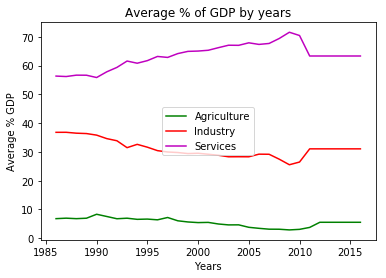

In [37]:
plt.plot(economy_grouped.index, economy_grouped.agriculture.values, color = 'g', label = "Agriculture")
plt.plot(economy_grouped.index, economy_grouped.industry.values, color = 'r', label = "Industry")
plt.plot(economy_grouped.index, economy_grouped.services.values, color = 'm', label = "Services")

show_line_plot('Average % GDP', 'Average % of GDP by years', legend = True)

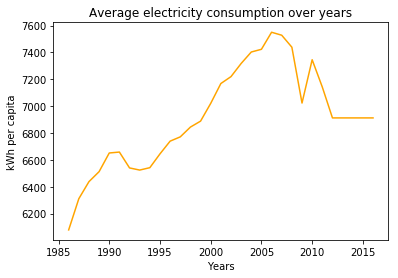

In [38]:
el_cons_by_year = filtered_data.groupby('year')['electricity_consumption'].mean()
plt.plot(el_cons_by_year.index, el_cons_by_year.values, color = 'orange')
show_line_plot("kWh per capita", "Average electricity consumption over years")

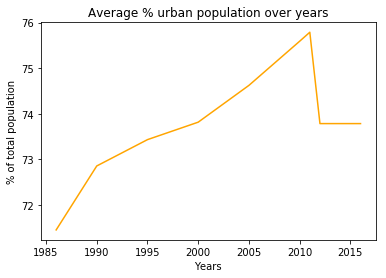

In [39]:
urban_pop_by_year = filtered_data.groupby('year')['urban_percent'].mean()
plt.plot(urban_pop_by_year.index, urban_pop_by_year.values, color = 'orange')
show_line_plot("% of total population", "Average % urban population over years")

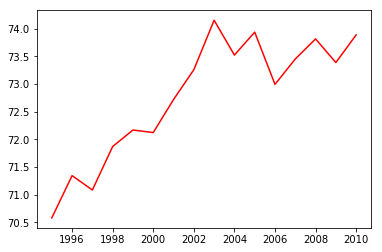

In [40]:
mean_expenditure = filtered_data.health_expenditure.mean()
most_expenditers = all_data[all_data.health_expenditure > mean_expenditure]
h = most_expenditers.groupby('year')['health_expenditure'].mean()
l = most_expenditers.groupby('year')['life_expectancy'].mean()

plt.plot(l.index, l.values, color = 'r', label = "Life expectancy")
plt.show()

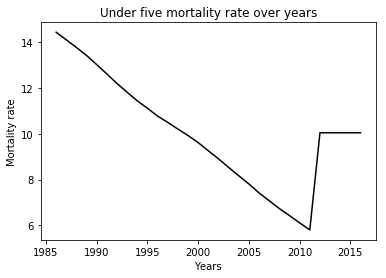

In [41]:
under_five_by_year = filtered_data.groupby('year')['under_five_mortality_rate'].mean()
plt.plot(under_five_by_year.index, under_five_by_year.values, color = 'black')
show_line_plot("Mortality rate", "Under five mortality rate over years")

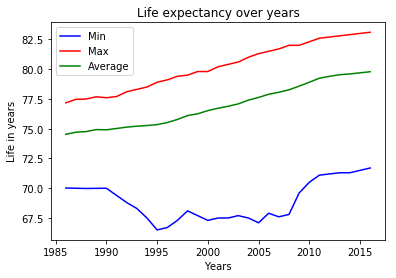

In [42]:
life_exp_by_year = filtered_data.groupby('year')['life_expectancy']

plt.plot(life_exp_by_year.min().index, life_exp_by_year.min().values, color = 'blue', label = "Min")
plt.plot(life_exp_by_year.max().index, life_exp_by_year.max().values, color = 'red', label = "Max")
plt.plot(life_exp_by_year.mean().index, life_exp_by_year.mean().values, color = 'green', label = "Average")

show_line_plot("Life in years", "Life expectancy over years", legend = True)

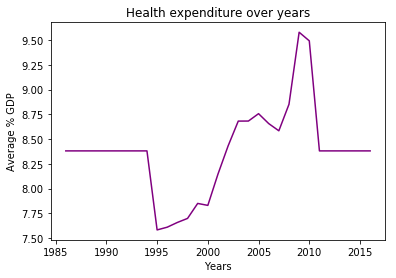

In [43]:
health_exp_by_year = filtered_data.groupby('year')['health_expenditure'].mean()
plt.plot(health_exp_by_year.index, health_exp_by_year.values, color = 'purple')
show_line_plot("Average % GDP", "Health expenditure over years")

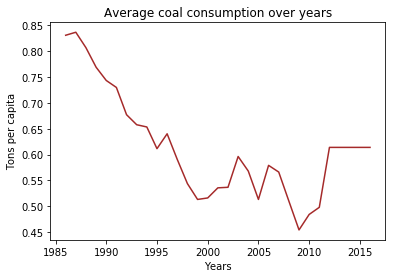

In [44]:
coal_cons_by_year = filtered_data.groupby('year')['coal_consumption'].mean()
plt.plot(coal_cons_by_year.index, coal_cons_by_year.values, color = 'brown')
show_line_plot("Tons per capita", "Average coal consumption over years")

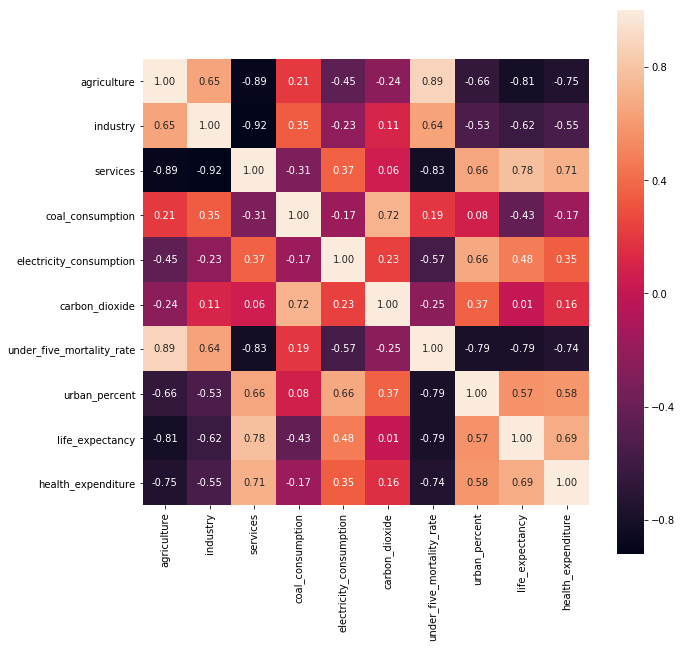

In [45]:
# show correlations
plt.figure(figsize = (10, 10))
sns.heatmap(filtered_data.corr(), annot = True, fmt = ".2f", square = True)

plt.show()